While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which you can download from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

## Read the Data set


In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars=star_wars[1:]

In [3]:
print(star_wars.columns)
star_wars.head()

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [4]:
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna= False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna= False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


## Convert the columns to 'Yes' or 'No'

In [5]:
def yes_no(ele):
    if ele  == 'Yes':
        return True
    elif ele  =='No':
        return False
    else:
        return np.NaN

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']= star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna = False))

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].apply(yes_no)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64


## Rename and Convert the have you seen Columns

In [7]:
star_wars = star_wars.rename(columns={'Which of the following Star Wars films have you seen? Please select all that apply.':'Seen_1',
       'Unnamed: 4':'Seen_2', 'Unnamed: 5':'Seen_3', 'Unnamed: 6':'Seen_4', 'Unnamed: 7':'Seen_5', 'Unnamed: 8':'Seen_6'})

print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_1', 'Seen_2', 'Seen_3', 'Seen_4', 'Seen_5', 'Seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do 

## Rename and Convert the Ranking Columns

In [8]:
## Change the seen columns to Yes or No
star_wars['Seen_1']=star_wars['Seen_1'].map({'Star Wars: Episode I  The Phantom Menace':True,np.NaN:False})
star_wars['Seen_2']=star_wars['Seen_2'].map({'Star Wars: Episode II  Attack of the Clones':True,np.NaN:False})
star_wars['Seen_3']=star_wars['Seen_3'].map({'Star Wars: Episode III  Revenge of the Sith':True,np.NaN:False})
star_wars['Seen_4']=star_wars['Seen_4'].map({'Star Wars: Episode IV  A New Hope':True,np.NaN:False})
star_wars['Seen_5']=star_wars['Seen_5'].map({'Star Wars: Episode V The Empire Strikes Back':True,np.NaN:False})
star_wars['Seen_6']=star_wars['Seen_6'].map({'Star Wars: Episode VI Return of the Jedi':True,np.NaN:False})
    

In [19]:

star_wars= star_wars.rename(columns= {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
       'Unnamed: 10':'ranking_2', 'Unnamed: 11':'ranking_3', 'Unnamed: 12':'ranking_4', 'Unnamed: 13':'ranking_5',
       'Unnamed: 14':'ranking_6'})
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Seen_1', 'Seen_2', 'Seen_3', 'Seen_4', 'Seen_5', 'Seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],

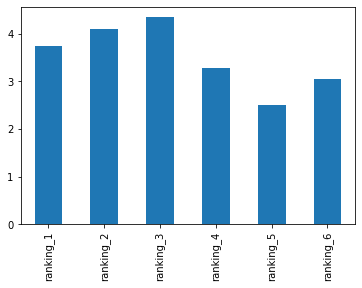

In [10]:
star_wars[['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6']].mean(axis=0).plot.bar()
plt.show()


## Rankings

So far, we've cleaned up the data, renamed several columns, and computed the average ranking of each movie. As I suspected, it looks like the "original" movies are rated much more highly than the newer ones.


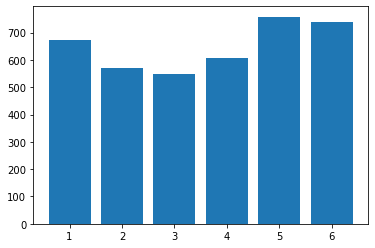

In [17]:

plt.bar(range(1,7), star_wars[star_wars.columns[3:9]].sum())
plt.show()


## View counts

It appears that the original movies were seen by more respondents than the newer movies. This reinforces what we saw in the rankings, where the earlier movies seem to be more popular.


In [12]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

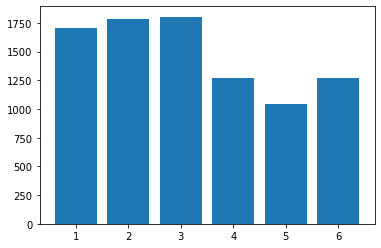

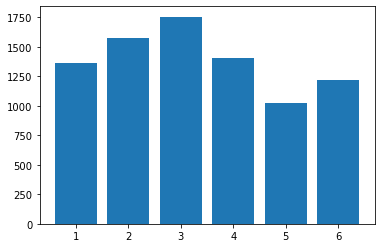

In [20]:
#Males rankings 
plt.bar(range(1,7), males[males.columns[9:15]].sum())
plt.show()

#Female Rankings
plt.bar(range(1,7), females[females.columns[9:15]].sum())
plt.show()

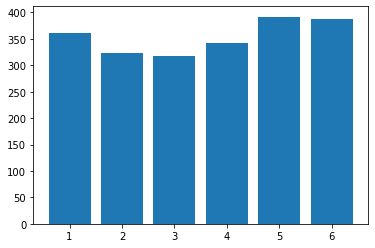

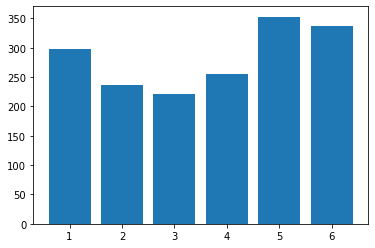

In [21]:
#Males Seen 
plt.bar(range(1,7), males[males.columns[3:9]].sum())
plt.show()

#Female Seen
plt.bar(range(1,7), females[females.columns[3:9]].sum())
plt.show()


## Male/Female differences in favorite Star Wars movie and most seen movie

Interestingly, more males watches episodes 1-3, but males liked them far less than females did.
